<a href="https://colab.research.google.com/github/Shanmukha2775/Fmml-lab-2024/blob/main/Module_01_Lab_02_MLPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [ ]:
 dataset =  datasets.fetch_california_housing()
 print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

<ipython-input-18-d89ecb46a347>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query              least index
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [ ]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
**1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?**


#**Answer 1:**

*  **Larger Validation Set:** A larger validation set provides a more reliable estimate of your model's performance. It has more data points to evaluate the model's generalization, which can lead to a more accurate prediction of how well your model will perform on unseen data.

*  **Smaller Validation Set:** A smaller validation set may introduce more variability in the validation accuracy estimate. With fewer samples for evaluation, the validation accuracy may not be as representative of the model's true generalization performance, making it a less reliable predictor of test accuracy.

**2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?**


#**Answer 2:**

**Impact on Predicting Test Accuracy:**

* When the training set is larger and the validation set is more substantial, the validation accuracy tends to be a better predictor of test accuracy. This is because a well-trained model with a large training set is more likely to generalize well to the test set, and the validation set has a sufficient sample size to reflect this.


* If the training set is small and the validation set is small, the validation accuracy may not be a good predictor of test accuracy. The model may not have learned enough from the training data, and the small validation set may not provide a reliable estimate of its generalization performance.

**3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?**



#**Answer 3:**

The choice of the percentage to reserve for the validation set can vary depending on several factors, including the size of our dataset, the complexity of your model, and your specific goals.

  1.Common Split Ratios

  2.Consider Data Size

  3.Complexity of the Model

  4.Goal of the Model ,  etc



Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

<ipython-input-21-de6fd6f2ab06>:4: RuntimeWarning: invalid value encountered in long_scalars
  return correct/len(gtlabel)


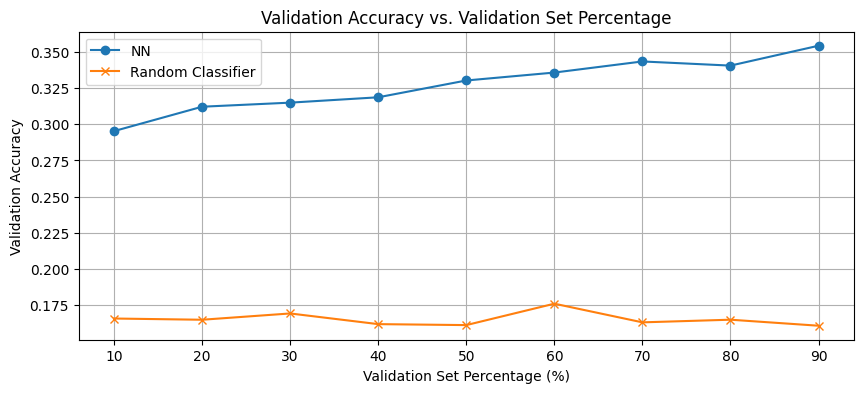

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

validation_percentages = np.arange(0.1, 1.01, 0.1)

nn_accuracies = []
random_accuracies = []

for val_percentage in validation_percentages:

    traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, val_percentage)

    nn_pred = NN(traindata, trainlabel, valdata)
    nn_accuracy = Accuracy(vallabel, nn_pred)
    nn_accuracies.append(nn_accuracy)

    random_pred = RandomClassifier(traindata, trainlabel, valdata)
    random_accuracy = Accuracy(vallabel, random_pred)
    random_accuracies.append(random_accuracy)

plt.figure(figsize=(10,4))
plt.plot(validation_percentages * 100, nn_accuracies, label='NN', marker="o", linestyle='-')
plt.plot(validation_percentages * 100, random_accuracies, label='Random Classifier', marker='x', linestyle='-')
plt.xlabel('Validation Set Percentage (%)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Validation Set Percentage')
plt.legend()
plt.grid(True)
plt.show()


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [ ]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3373120868446605
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>



### Questions
**1. Does averaging the validation accuracy across multiple splits give more consistent results?**


#**Answer 1:**

* Yes, averaging the validation accuracy across multiple data splits can give more consistent and reliable results when evaluating the performance of a machine learning model. This technique is commonly referred to as "cross-validation"

* Common cross-validation techniques include k-fold cross-validation and stratified k-fold cross-validation, where the dataset is split into k subsets, and the model is trained and evaluated k times, each time using a different fold as the validation set and the remaining folds as the training set.

* averaging validation accuracy across multiple splits is a valuable practice in machine learning to obtain a more reliable assessment of a model's performance and make more informed decisions about model selection and hyperparameter tuning.

**2. Does it give more accurate estimate of test accuracy?**


#**Answer 2:**

Averaging validation accuracy across multiple data splits, as performed in cross-validation, provides a more accurate estimate of a model's performance on unseen data, which is analogous to the test accuracy. However, it's important to understand that cross-validation estimates are still approximations of how your model will perform on truly unseen data.

**3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?**


#**Answer 3:**

* The number of iterations in cross-validation can have an impact on the estimate of model performance. In general, increasing the number of iterations (also known as "folds") can lead to a more robust and reliable estimate, but there are trade-offs to consider

          More Stable Estimate
          Reduced Bias
          Increased Computational Cost
          Diminishing Returns

* while increasing the number of iterations can improve the estimate's reliability, other factors, such as the quality of the data, the choice of the evaluation metric, and the choice of the hyperparameters, also play crucial roles in obtaining an accurate estimate of model performance.







**4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?**


#**Answer 4:**

* Increasing the number of iterations (folds) in cross-validation can help mitigate some issues associated with having a very small training or validation dataset, but it doesn't fully replace the need for a sufficiently sized dataset.

* A small dataset presents inherent challenges, and additional strategies should be explored to address those challenges effectively.